In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# LOAD THE DATA

In [327]:
train = pd.read_csv('./EDA_TRAIN.csv')
train.head(1)

,Unnamed: 0,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Day,Month,Year,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,149,5,2007,0,0,0,1,0,0,0,0


In [328]:
train.shape

(9693, 23)

In [329]:
test = pd.read_csv('./EDA_TEST.csv')
test.head(1)

,Unnamed: 0,Id,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Day,Month,Year,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS
0,0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,149.0,5.0,2007.0,0,0,0,1,0,0,0,0


In [330]:
test.shape

(116293, 22)

In [331]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9693 entries, 0 to 9692
Data columns (total 23 columns):
Unnamed: 0                   9693 non-null int64
Date                         9693 non-null object
Address                      9693 non-null object
Block                        9693 non-null int64
Street                       9693 non-null object
Trap                         9693 non-null object
AddressNumberAndStreet       9693 non-null object
Latitude                     9693 non-null float64
Longitude                    9693 non-null float64
AddressAccuracy              9693 non-null int64
NumMosquitos                 9693 non-null int64
WnvPresent                   9693 non-null int64
Day                          9693 non-null int64
Month                        9693 non-null int64
Year                         9693 non-null int64
Species_ERRATICUS            9693 non-null int64
Species_SALINARIUS           9693 non-null int64
Species_UNSPECIFIED CULEX    9693 non-null int64
Sp

In [332]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 22 columns):
Unnamed: 0                   116293 non-null int64
Id                           116293 non-null int64
Date                         116293 non-null object
Address                      116293 non-null object
Block                        116293 non-null int64
Street                       116293 non-null object
Trap                         116293 non-null object
AddressNumberAndStreet       116293 non-null object
Latitude                     116293 non-null float64
Longitude                    116293 non-null float64
AddressAccuracy              116293 non-null int64
Day                          10506 non-null float64
Month                        10506 non-null float64
Year                         10506 non-null float64
Species_ERRATICUS            116293 non-null int64
Species_SALINARIUS           116293 non-null int64
Species_UNSPECIFIED CULEX    116293 non-null int64
Species_PI

# Basic EDA on Train and Test

In [333]:
# Train Date needs to be set as datetime
train['Date'] = pd.to_datetime(train['Date'], infer_datetime_format=True)

In [334]:
# Transforming object features to categorical features
train['Address'] = train['Address'].astype('category')
train['Street']  = train['Street'].astype('category')
train['Trap']    = train['Trap'].astype('category')
train['AddressNumberAndStreet'] = train['AddressNumberAndStreet'].astype('category')

In [335]:
# Drop Unnamed
train = train.drop(['Unnamed: 0'], axis=1)
train.dtypes

Date                         datetime64[ns]
Address                            category
Block                                 int64
Street                             category
Trap                               category
AddressNumberAndStreet             category
Latitude                            float64
Longitude                           float64
AddressAccuracy                       int64
NumMosquitos                          int64
WnvPresent                            int64
Day                                   int64
Month                                 int64
Year                                  int64
Species_ERRATICUS                     int64
Species_SALINARIUS                    int64
Species_UNSPECIFIED CULEX             int64
Species_PIPIENS/RESTUANS              int64
Species_TERRITANS                     int64
Species_RESTUANS                      int64
Species_PIPIENS                       int64
Species_TARSALIS                      int64
dtype: object

In [336]:
#dummies for day of the year and year
train = pd.get_dummies(train, columns=['Day', 'Year'])
train.shape

(9693, 101)

In [337]:
# Test Date needs to be set as datetime
test['Date'] = pd.to_datetime(test['Date'], infer_datetime_format=True)

In [338]:
# Transforming object features to categorical features
test['Address'] = test['Address'].astype('category')
test['Street']  = test['Street'].astype('category')
test['Trap']    = test['Trap'].astype('category')
test['AddressNumberAndStreet'] = test['AddressNumberAndStreet'].astype('category')

In [339]:
# Drop Unnamed
test = test.drop(['Unnamed: 0'], axis=1)
test.dtypes

Id                                    int64
Date                         datetime64[ns]
Address                            category
Block                                 int64
Street                             category
Trap                               category
AddressNumberAndStreet             category
Latitude                            float64
Longitude                           float64
AddressAccuracy                       int64
Day                                 float64
Month                               float64
Year                                float64
Species_ERRATICUS                     int64
Species_SALINARIUS                    int64
Species_UNSPECIFIED CULEX             int64
Species_PIPIENS/RESTUANS              int64
Species_TERRITANS                     int64
Species_RESTUANS                      int64
Species_PIPIENS                       int64
Species_TARSALIS                      int64
dtype: object

In [340]:
#dummies for day of the year and year
test = pd.get_dummies(test, columns=['Day', 'Year'])
test.shape

(116293, 100)

# MODEL 0

In [341]:
train.head(1)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Month,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS,Day_148,Day_149,Day_153,Day_154,Day_156,Day_158,Day_161,Day_163,Day_165,Day_166,Day_168,Day_170,Day_172,Day_173,Day_175,Day_177,Day_178,Day_179,Day_180,Day_181,Day_183,Day_187,Day_189,Day_191,Day_192,Day_193,Day_194,Day_196,Day_198,Day_199,Day_200,Day_205,Day_206,Day_208,Day_210,Day_212,Day_213,Day_214,Day_215,Day_217,Day_219,Day_220,Day_221,Day_224,Day_225,Day_227,Day_228,Day_229,Day_231,Day_233,Day_234,Day_236,Day_237,Day_238,Day_239,Day_240,Day_241,Day_244,Day_245,Day_246,Day_247,Day_248,Day_249,Day_255,Day_257,Day_259,Day_260,Day_261,Day_262,Day_266,Day_267,Day_268,Day_269,Day_273,Day_274,Day_277,Day_282,Year_2007,Year_2009,Year_2011,Year_2013
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [342]:
train.columns

Index(['Date', 'Address', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet',
       'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos',
       ...
       'Day_268', 'Day_269', 'Day_273', 'Day_274', 'Day_277', 'Day_282',
       'Year_2007', 'Year_2009', 'Year_2011', 'Year_2013'],
      dtype='object', length=101)

In [343]:
#Define Predictors and Target for Baseline
X = train.drop(['Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy', 'Trap', 'Date', 'Month', 'WnvPresent', 'NumMosquitos'], axis=1)
y = train['WnvPresent']

In [344]:
X.columns

Index(['Latitude', 'Longitude', 'Species_ERRATICUS', 'Species_SALINARIUS',
       'Species_UNSPECIFIED CULEX', 'Species_PIPIENS/RESTUANS',
       'Species_TERRITANS', 'Species_RESTUANS', 'Species_PIPIENS',
       'Species_TARSALIS', 'Day_148', 'Day_149', 'Day_153', 'Day_154',
       'Day_156', 'Day_158', 'Day_161', 'Day_163', 'Day_165', 'Day_166',
       'Day_168', 'Day_170', 'Day_172', 'Day_173', 'Day_175', 'Day_177',
       'Day_178', 'Day_179', 'Day_180', 'Day_181', 'Day_183', 'Day_187',
       'Day_189', 'Day_191', 'Day_192', 'Day_193', 'Day_194', 'Day_196',
       'Day_198', 'Day_199', 'Day_200', 'Day_205', 'Day_206', 'Day_208',
       'Day_210', 'Day_212', 'Day_213', 'Day_214', 'Day_215', 'Day_217',
       'Day_219', 'Day_220', 'Day_221', 'Day_224', 'Day_225', 'Day_227',
       'Day_228', 'Day_229', 'Day_231', 'Day_233', 'Day_234', 'Day_236',
       'Day_237', 'Day_238', 'Day_239', 'Day_240', 'Day_241', 'Day_244',
       'Day_245', 'Day_246', 'Day_247', 'Day_248', 'Day_249', 'Day

In [345]:
X.shape

(9693, 91)

In [346]:
#Scale data train
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_s = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

In [347]:
#Adjusting test so it will be ready to predict on models
test=test.drop(['Id','Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy', 'Trap', 'Date', 'Month'], axis=1)
test.shape

(116293, 91)

In [348]:
#Scale data test
test = pd.DataFrame(ss.transform(test), columns=test.columns)

In [349]:
#Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, random_state=42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7269, 91) (7269,)
(2424, 91) (2424,)


In [351]:
#Function to evaluate models using confusion matrix and sumary of scores
def model_evaluation(y_test, predictions, model=None, X=None):
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(data = cm, columns = ['Predicted WNV', 'Predicted not WNV',
                                           ], index = ['Actual WNV', 'Actual not WNV'])
    print(cm_df)
    print(metrics.classification_report(y_test, predictions))
    

## 0.1 Logistic Regression

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [353]:
from sklearn.metrics import roc_auc_score

In [354]:
#Model 0.1 Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
y_hat_lr = lr.predict(X_test)
y_hat_lr_tr = lr.predict(X_train)
print("log reg score train: {}".format(score_train))
print("log reg score test: {}".format(score_test))

log reg score train: 0.9484110606685927
log reg score test: 0.9467821782178217


In [355]:
y_hat_test = lr.predict(test)

In [356]:
y_hat_test

array([0, 0, 0, ..., 0, 0, 0])

In [357]:
model_evaluation(y_test, y_hat_lr, model=lr)

                Predicted WNV  Predicted not WNV
Actual WNV               2294                  4
Actual not WNV            125                  1
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      2298
          1       0.20      0.01      0.02       126

avg / total       0.91      0.95      0.92      2424



In [358]:
pred_prob_lr = lr.predict_proba(X_train)

probas_lr = []
for p in pred_prob_lr:
    probas_lr.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_lr)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8591456900015548


In [359]:
pred_prob_lr = lr.predict_proba(X_test)

probas_lr = []
for p in pred_prob_lr:
    probas_lr.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_lr)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8580028181855859


## 0.2 Random Forest

In [278]:
#Model 0.2:  KNN Classifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score_train = knn.score(X_train, y_train)
score_test = knn.score(X_test, y_test)
y_hat_knn = knn.predict(X_test)
y_hat_knn_tr = knn.predict(X_train)
print("KNN classifier score train: {}".format(score_train))
print("KNN classifier score test: {}".format(score_test))

KNN classifier score train: 0.9517127527858027
KNN classifier score test: 0.9438943894389439


In [279]:
model_evaluation(y_test, y_hat_knn, model = knn)

                Predicted WNV  Predicted not WNV
Actual WNV               2282                 16
Actual not WNV            120                  6
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2298
          1       0.27      0.05      0.08       126

avg / total       0.91      0.94      0.92      2424



In [280]:
pred_prob_knn = knn.predict_proba(X_train)

probas_knn = []
for p in pred_prob_knn:
    probas_knn.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_knn)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9451033836178031


In [281]:
pred_prob_knn = knn.predict_proba(X_test)

probas_knn = []
for p in pred_prob_knn:
    probas_knn.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_knn)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.710705996933151


## 0.3 Decision Tree

In [282]:
#Model 0.3:  Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
score_train = dt.score(X_train, y_train)
score_test = dt.score(X_test, y_test)
y_hat_dt = dt.predict(X_test)
y_hat_dt_tr = dt.predict(X_train)
print("Decision Tree score train: {}".format(score_train))
print("Decision Tree score test: {}".format(score_test))

Decision Tree score train: 0.9862429495116247
Decision Tree score test: 0.9154290429042904


In [283]:
model_evaluation(y_test, y_hat_dt)

                Predicted WNV  Predicted not WNV
Actual WNV               2198                100
Actual not WNV            105                 21
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      2298
          1       0.17      0.17      0.17       126

avg / total       0.91      0.92      0.91      2424



In [284]:
pred_prob_dt = dt.predict_proba(X_train)

probas_dt = []
for p in pred_prob_dt:
    probas_dt.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_dt)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9975489592361728


In [285]:
pred_prob_dt = dt.predict_proba(X_test)

probas_dt = []
for p in pred_prob_dt:
    probas_dt.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_dt)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.5968768563416081


## 0.4 Bagging Tree

In [286]:
#Model 0.4:  Bagging Tree Classifier

bt = BaggingClassifier()
bt.fit(X_train, y_train)
score_train = bt.score(X_train, y_train)
score_test = bt.score(X_test, y_test)
y_hat_bt = bt.predict(X_test)
y_hat_bt_tr = bt.predict(X_train)
print("Bagged Tree score train: {}".format(score_train))
print("Bagged Tree score test: {}".format(score_test))

Bagged Tree score train: 0.9797771357820884
Bagged Tree score test: 0.9315181518151815


In [287]:
model_evaluation(y_test, y_hat_bt, model=bt)

                Predicted WNV  Predicted not WNV
Actual WNV               2238                 60
Actual not WNV            106                 20
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      2298
          1       0.25      0.16      0.19       126

avg / total       0.92      0.93      0.92      2424



In [288]:
pred_prob_bt = bt.predict_proba(X_train)

probas_bt = []
for p in pred_prob_bt:
    probas_bt.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_bt)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9944913643004383


In [290]:
pred_prob_bt = bt.predict_proba(X_test)

probas_bt = []
for p in pred_prob_bt:
    probas_bt.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_bt)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6976598007929601


## 0.5 Random Forest

In [94]:
#Model 5:  Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
score_train = rf.score(X_train, y_train)
score_test = rf.score(X_test, y_test)
y_hat_rf = rf.predict(X_test)
y_hat_rf_tr = rf.predict(X_train)
print("Random Forest score train: {}".format(score_train))
print("Random Forest score test: {}".format(score_test))
print("ROC AUC rf score train: {}".format(roc_auc_score(y_train, y_hat_rf_tr)))
print("ROC AUC rf score test: {}".format(roc_auc_score(y_test, y_hat_rf)))

Random Forest score train: 0.9801898472967395
Random Forest score test: 0.9397689768976898
ROC AUC rf score train: 0.8403613692729509
ROC AUC rf score test: 0.5481578183928053


In [95]:
model_evaluation(y_test, y_hat_rf, model=rf)

                Predicted WNV  Predicted not WNV
Actual WNV               2264                 34
Actual not WNV            112                 14
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2298
          1       0.29      0.11      0.16       126

avg / total       0.92      0.94      0.93      2424



In [291]:
pred_prob_rf = rf.predict_proba(X_train)

probas_rf = []
for p in pred_prob_rf:
    probas_rf.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_rf)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8472917125302699


In [292]:
pred_prob_rf = rf.predict_proba(X_test)

probas_rf = []
for p in pred_prob_rf:
    probas_rf.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_rf)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6711236133559892


## 0.6 Adaboost Classifier

In [294]:
#Model 0.6:  Adaboost Classifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
score_train = ada.score(X_train, y_train)
score_test = ada.score(X_test, y_test)
y_hat_ada = ada.predict(X_test)
y_hat_ada_tr = ada.predict(X_train)
print("Adaboost score train: {}".format(score_train))
print("Adaboost score test: {}".format(score_test))

Adaboost score train: 0.9460723620855689
Adaboost score test: 0.9455445544554455


In [295]:
model_evaluation(y_test, y_hat_ada, model=ada)

                Predicted WNV  Predicted not WNV
Actual WNV               2285                 13
Actual not WNV            119                  7
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2298
          1       0.35      0.06      0.10       126

avg / total       0.92      0.95      0.93      2424



In [296]:
pred_prob_ada = ada.predict_proba(X_train)

probas_ada = []
for p in pred_prob_ada:
    probas_ada.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_train, probas_ada)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.854121797309301


In [297]:
pred_prob_ada = ada.predict_proba(X_test)

probas_ada = []
for p in pred_prob_ada:
    probas_ada.append(p[1])

from sklearn.metrics import roc_curve, auc

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, probas_ada)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8464762319200961


## 0.7 Support Vector Classifier

In [298]:
#Model 0.7:  Support Vector Classifier

svc = SVC()
svc.fit(X_train, y_train)
score_train = svc.score(X_train, y_train)
score_test = svc.score(X_test, y_test)
y_hat_svc = svc.predict(X_test)
y_hat_svc_tr = svc.predict(X_train)
print("SVC score train: {}".format(score_train))
print("SVC score test: {}".format(score_test))

SVC score train: 0.9481359196588252
SVC score test: 0.948019801980198


In [299]:
model_evaluation(y_test, y_hat_svc, model=svc)

                Predicted WNV  Predicted not WNV
Actual WNV               2298                  0
Actual not WNV            126                  0
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      2298
          1       0.00      0.00      0.00       126

avg / total       0.90      0.95      0.92      2424



/Users/belensanchez/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Best Model in this scenario:  Logistic Regression

In [360]:
#Predictions with Logistic Regression on Test Hold Out Set Data
y_hat_test = lr.predict(test)
y_hat_test

array([0, 0, 0, ..., 0, 0, 0])

In [361]:
test['Predictions'] = y_hat_test

In [362]:
test['Predictions'].value_counts()

0    110699
1      5594
Name: Predictions, dtype: int64

In [363]:
test.shape

(116293, 92)

In [364]:
pd.set_option('max_columns', None) #to see all dataframe

In [405]:
test.head()

,Latitude,Longitude,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS,Day_148.0,Day_149.0,Day_153.0,Day_154.0,Day_156.0,Day_158.0,Day_161.0,Day_163.0,Day_165.0,Day_166.0,Day_168.0,Day_170.0,Day_172.0,Day_173.0,Day_175.0,Day_177.0,Day_178.0,Day_179.0,Day_180.0,Day_181.0,Day_183.0,Day_187.0,Day_189.0,Day_191.0,Day_192.0,Day_193.0,Day_194.0,Day_196.0,Day_198.0,Day_199.0,Day_200.0,Day_205.0,Day_206.0,Day_208.0,Day_210.0,Day_212.0,Day_213.0,Day_214.0,Day_215.0,Day_217.0,Day_219.0,Day_220.0,Day_221.0,Day_224.0,Day_225.0,Day_227.0,Day_228.0,Day_229.0,Day_231.0,Day_233.0,Day_234.0,Day_236.0,Day_237.0,Day_238.0,Day_239.0,Day_240.0,Day_241.0,Day_244.0,Day_245.0,Day_246.0,Day_247.0,Day_248.0,Day_249.0,Day_255.0,Day_257.0,Day_259.0,Day_260.0,Day_261.0,Day_262.0,Day_266.0,Day_267.0,Day_268.0,Day_269.0,Day_273.0,Day_274.0,Day_277.0,Day_282.0,Year_2007.0,Year_2009.0,Year_2011.0,Year_2013.0,Predictions
0,0.978631,-1.050387,-0.010158,-0.094057,0.0,1.081176,-0.152748,-0.616906,-0.548065,-0.024887,-0.077587,19.665198,-0.097889,-0.036647,-0.119735,-0.089485,-0.076911,-0.098425,-0.110056,-0.057552,-0.105651,-0.098425,-0.109092,-0.039369,-0.096809,-0.129963,-0.080234,-0.076911,-0.080234,-0.106645,-0.08771,-0.10763,-0.109575,-0.097889,-0.17624,-0.132001,-0.078257,-0.131596,-0.129552,-0.114762,-0.148449,-0.096809,-0.191821,-0.128312,-0.119291,-0.117047,-0.263206,-0.108119,-0.017595,-0.120619,-0.183274,-0.149534,-0.050851,-0.114762,-0.104143,-0.21335,-0.039369,-0.064372,-0.111488,-0.139489,-0.162041,-0.139489,-0.092368,-0.105151,-0.074148,-0.073441,-0.119735,-0.080234,-0.070546,-0.074848,-0.097889,-0.078921,-0.134407,-0.208548,-0.106645,-0.111961,-0.113835,-0.098425,-0.149173,-0.106645,-0.12914,-0.121933,-0.097889,-0.079581,-0.082165,-0.139489,-0.051861,1.414214,-0.532129,-0.509879,-0.561424,0
1,0.978631,-1.050387,-0.010158,-0.094057,0.0,-0.924919,-0.152748,1.620993,-0.548065,-0.024887,-0.077587,19.665198,-0.097889,-0.036647,-0.119735,-0.089485,-0.076911,-0.098425,-0.110056,-0.057552,-0.105651,-0.098425,-0.109092,-0.039369,-0.096809,-0.129963,-0.080234,-0.076911,-0.080234,-0.106645,-0.08771,-0.10763,-0.109575,-0.097889,-0.17624,-0.132001,-0.078257,-0.131596,-0.129552,-0.114762,-0.148449,-0.096809,-0.191821,-0.128312,-0.119291,-0.117047,-0.263206,-0.108119,-0.017595,-0.120619,-0.183274,-0.149534,-0.050851,-0.114762,-0.104143,-0.21335,-0.039369,-0.064372,-0.111488,-0.139489,-0.162041,-0.139489,-0.092368,-0.105151,-0.074148,-0.073441,-0.119735,-0.080234,-0.070546,-0.074848,-0.097889,-0.078921,-0.134407,-0.208548,-0.106645,-0.111961,-0.113835,-0.098425,-0.149173,-0.106645,-0.12914,-0.121933,-0.097889,-0.079581,-0.082165,-0.139489,-0.051861,1.414214,-0.532129,-0.509879,-0.561424,0
2,0.978631,-1.050387,-0.010158,-0.094057,0.0,-0.924919,-0.152748,-0.616906,1.824600,-0.024887,-0.077587,19.665198,-0.097889,-0.036647,-0.119735,-0.089485,-0.076911,-0.098425,-0.110056,-0.057552,-0.105651,-0.098425,-0.109092,-0.039369,-0.096809,-0.129963,-0.080234,-0.076911,-0.080234,-0.106645,-0.08771,-0.10763,-0.109575,-0.097889,-0.17624,-0.132001,-0.078257,-0.131596,-0.129552,-0.114762,-0.148449,-0.096809,-0.191821,-0.128312,-0.119291,-0.117047,-0.263206,-0.108119,-0.017595,-0.120619,-0.183274,-0.149534,-0.050851,-0.114762,-0.104143,-0.21335,-0.039369,-0.064372,-0.111488,-0.139489,-0.162041,-0.139489,-0.092368,-0.105151,-0.074148,-0.073441,-0.119735,-0.080234,-0.070546,-0.074848,-0.097889,-0.078921,-0.134407,-0.208548,-0.106645,-0.111961,-0.113835,-0.098425,-0.149173,-0.106645,-0.12914,-0.121933,-0.097889,-0.079581,-0.082165,-0.139489,-0.051861,1.414214,-0.532129,-0.509879,-0.561424,0
3,0.978631,-1.050387,-0.010158,10.631806,0.0,-0.924919,-0.152748,-0.616906,-0.548065,-0.024887,-0.077587,19.665198,-0.097889,-0.036647,-0.119735,-0.089485,-0.076911,-0.098425,-0.110056,-0.057552,-0.105651,-0.098425,-0.109092,-0.039369,-0.096809,-0.129963,-0.080234,-0.076911,-0.080234,-0.106645

In [365]:
#Places and Dates where WNV will happen
future_WNV=test[test['Predictions']==1]
future_WNV.head()

,Latitude,Longitude,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS,Day_148.0,Day_149.0,Day_153.0,Day_154.0,Day_156.0,Day_158.0,Day_161.0,Day_163.0,Day_165.0,Day_166.0,Day_168.0,Day_170.0,Day_172.0,Day_173.0,Day_175.0,Day_177.0,Day_178.0,Day_179.0,Day_180.0,Day_181.0,Day_183.0,Day_187.0,Day_189.0,Day_191.0,Day_192.0,Day_193.0,Day_194.0,Day_196.0,Day_198.0,Day_199.0,Day_200.0,Day_205.0,Day_206.0,Day_208.0,Day_210.0,Day_212.0,Day_213.0,Day_214.0,Day_215.0,Day_217.0,Day_219.0,Day_220.0,Day_221.0,Day_224.0,Day_225.0,Day_227.0,Day_228.0,Day_229.0,Day_231.0,Day_233.0,Day_234.0,Day_236.0,Day_237.0,Day_238.0,Day_239.0,Day_240.0,Day_241.0,Day_244.0,Day_245.0,Day_246.0,Day_247.0,Day_248.0,Day_249.0,Day_255.0,Day_257.0,Day_259.0,Day_260.0,Day_261.0,Day_262.0,Day_266.0,Day_267.0,Day_268.0,Day_269.0,Day_273.0,Day_274.0,Day_277.0,Day_282.0,Year_2007.0,Year_2009.0,Year_2011.0,Year_2013.0,Predictions
479,0.695732,-0.882368,98.447956,-0.094057,0.0,-0.924919,-0.152748,-0.616906,-0.548065,-0.024887,-0.077587,-0.050851,-0.097889,-0.036647,-0.119735,-0.089485,-0.076911,-0.098425,-0.110056,-0.057552,-0.105651,-0.098425,-0.109092,-0.039369,-0.096809,-0.129963,-0.080234,-0.076911,-0.080234,-0.106645,-0.08771,-0.10763,-0.109575,-0.097889,-0.17624,-0.132001,-0.078257,-0.131596,-0.129552,8.7137,-0.148449,-0.096809,-0.191821,-0.128312,-0.119291,-0.117047,-0.263206,-0.108119,-0.017595,-0.120619,-0.183274,-0.149534,-0.050851,-0.114762,-0.104143,-0.21335,-0.039369,-0.064372,-0.111488,-0.139489,-0.162041,-0.139489,-0.092368,-0.105151,-0.074148,-0.073441,-0.119735,-0.080234,-0.070546,-0.074848,-0.097889,-0.078921,-0.134407,-0.208548,-0.106645,-0.111961,-0.113835,-0.098425,-0.149173,-0.106645,-0.12914,-0.121933,-0.097889,-0.079581,-0.082165,-0.139489,-0.051861,1.414214,-0.532129,-0.509879,-0.561424,1
487,1.120829,-0.911300,98.447956,-0.094057,0.0,-0.924919,-0.152748,-0.616906,-0.548065,-0.024887,-0.077587,-0.050851,-0.097889,-0.036647,-0.119735,-0.089485,-0.076911,-0.098425,-0.110056,-0.057552,-0.105651,-0.098425,-0.109092,-0.039369,-0.096809,-0.129963,-0.080234,-0.076911,-0.080234,-0.106645,-0.08771,-0.10763,-0.109575,-0.097889,-0.17624,-0.132001,-0.078257,-0.131596,-0.129552,8.7137,-0.148449,-0.096809,-0.191821,-0.128312,-0.119291,-0.117047,-0.263206,-0.108119,-0.017595,-0.120619,-0.183274,-0.149534,-0.050851,-0.114762,-0.104143,-0.21335,-0.039369,-0.064372,-0.111488,-0.139489,-0.162041,-0.139489,-0.092368,-0.105151,-0.074148,-0.073441,-0.119735,-0.080234,-0.070546,-0.074848,-0.097889,-0.078921,-0.134407,-0.208548,-0.106645,-0.111961,-0.113835,-0.098425,-0.149173,-0.106645,-0.12914,-0.121933,-0.097889,-0.079581,-0.082165,-0.139489,-0.051861,1.414214,-0.532129,-0.509879,-0.561424,1
519,0.845828,-0.985172,98.447956,-0.094057,0.0,-0.924919,-0.152748,-0.616906,-0.548065,-0.024887,-0.077587,-0.050851,-0.097889,-0.036647,-0.119735,-0.089485,-0.076911,-0.098425,-0.110056,-0.057552,-0.105651,-0.098425,-0.109092,-0.039369,-0.096809,-0.129963,-0.080234,-0.076911,-0.080234,-0.106645,-0.08771,-0.10763,-0.109575,-0.097889,-0.17624,-0.132001,-0.078257,-0.131596,-0.129552,8.7137,-0.148449,-0.096809,-0.191821,-0.128312,-0.119291,-0.117047,-0.263206,-0.108119,-0.017595,-0.120619,-0.183274,-0.149534,-0.050851,-0.114762,-0.104143,-0.21335,-0.039369,-0.064372,-0.111488,-0.139489,-0.162041,-0.139489,-0.092368,-0.105151,-0.074148,-0.073441,-0.119735,-0.080234,-0.070546,-0.074848,-0.097889,-0.078921,-0.134407,-0.208548,-0.106645,-0.111961,-0.113835,-0.098425,-0.149173,-0.106645,-0.12914,-0.121933,-0.097889,-0.079581,-0.082165,-0.139489,-0.051861,1.414214,-0.532129,-0.509879,-0.561424,1
535,0.863687,-0.787107,98.447956,-0.094057,0.0,-0.924919,-0.152748,-0.616906,-0.548065,-0.024887,-0.077587,-0.050851,-0.097889,-0.036647,-0.119735,-0.089485,-0.076911,-0.098425,-0.110056,-0.057552,-0.105651,-0.098425,-0.109092,-0.039369,-0.096809,-0.129963,-0.080234,-0.076911,-0.080234,-0.1066

In [388]:
future_WNV.columns

Index(['Latitude', 'Longitude', 'Species_ERRATICUS', 'Species_SALINARIUS',
       'Species_UNSPECIFIED CULEX', 'Species_PIPIENS/RESTUANS',
       'Species_TERRITANS', 'Species_RESTUANS', 'Species_PIPIENS',
       'Species_TARSALIS', 'Day_148.0', 'Day_149.0', 'Day_153.0', 'Day_154.0',
       'Day_156.0', 'Day_158.0', 'Day_161.0', 'Day_163.0', 'Day_165.0',
       'Day_166.0', 'Day_168.0', 'Day_170.0', 'Day_172.0', 'Day_173.0',
       'Day_175.0', 'Day_177.0', 'Day_178.0', 'Day_179.0', 'Day_180.0',
       'Day_181.0', 'Day_183.0', 'Day_187.0', 'Day_189.0', 'Day_191.0',
       'Day_192.0', 'Day_193.0', 'Day_194.0', 'Day_196.0', 'Day_198.0',
       'Day_199.0', 'Day_200.0', 'Day_205.0', 'Day_206.0', 'Day_208.0',
       'Day_210.0', 'Day_212.0', 'Day_213.0', 'Day_214.0', 'Day_215.0',
       'Day_217.0', 'Day_219.0', 'Day_220.0', 'Day_221.0', 'Day_224.0',
       'Day_225.0', 'Day_227.0', 'Day_228.0', 'Day_229.0', 'Day_231.0',
       'Day_233.0', 'Day_234.0', 'Day_236.0', 'Day_237.0', 'Day_238

In [384]:
future_WNV.to_csv('PREDSMODEL0COMPLETE.csv')

In [382]:
future_map = future_WNV[['Latitude', 'Longitude', 'Predictions']]
future_map.head()

,Latitude,Longitude,Predictions
479,0.695732,-0.882368,1
487,1.120829,-0.911300,1
519,0.845828,-0.985172,1
535,0.863687,-0.787107,1
543,1.032794,-0.795710,1


In [383]:
future_map.to_csv('PREDSMODEL0.csv')

In [381]:
len(future_map['Latitude'].unique())

151

In [380]:
len(future_map['Longitude'].unique())

151

In [393]:
locations.shape

(5594, 3)

In [397]:
locations.head(5)

,Longitude,Latitude,Predictions
0,-0.882368,0.695732,1
1,-0.911300,1.120829,1
2,-0.985172,0.845828,1
3,-0.787107,0.863687,1
4,-0.795710,1.032794,1


## Reloading test data to include predictions and graph

In [398]:
test33 = pd.read_csv('./EDA_TEST.csv')
test33.head(1)

,Unnamed: 0,Id,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Day,Month,Year,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS
0,0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,149.0,5.0,2007.0,0,0,0,1,0,0,0,0


In [399]:
test33.shape

(116293, 22)

# Basic EDA on Test

In [400]:
# Test Date needs to be set as datetime
test33['Date'] = pd.to_datetime(test33['Date'], infer_datetime_format=True)

In [401]:
# Transforming object features to categorical features
test33['Address'] = test33['Address'].astype('category')
test33['Street']  = test33['Street'].astype('category')
test33['Trap']    = test33['Trap'].astype('category')
test33['AddressNumberAndStreet'] = test33['AddressNumberAndStreet'].astype('category')

In [402]:
# Drop Unnamed
test33 = test33.drop(['Unnamed: 0'], axis=1)
test33.dtypes

Id                                    int64
Date                         datetime64[ns]
Address                            category
Block                                 int64
Street                             category
Trap                               category
AddressNumberAndStreet             category
Latitude                            float64
Longitude                           float64
AddressAccuracy                       int64
Day                                 float64
Month                               float64
Year                                float64
Species_ERRATICUS                     int64
Species_SALINARIUS                    int64
Species_UNSPECIFIED CULEX             int64
Species_PIPIENS/RESTUANS              int64
Species_TERRITANS                     int64
Species_RESTUANS                      int64
Species_PIPIENS                       int64
Species_TARSALIS                      int64
dtype: object

In [403]:
#dummies for day of the year and year
test33 = pd.get_dummies(test33, columns=['Day', 'Year'])
test33.shape

(116293, 100)

In [404]:
#Adjusting test so it will be ready to predict on models
test33=test33.drop(['Id','Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy', 'Trap', 'Date', 'Month'], axis=1)
test33.shape

(116293, 91)

In [407]:
test33['Predictions']=test['Predictions']

In [408]:
test33.head(3)

,Latitude,Longitude,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS,Day_148.0,Day_149.0,Day_153.0,Day_154.0,Day_156.0,Day_158.0,Day_161.0,Day_163.0,Day_165.0,Day_166.0,Day_168.0,Day_170.0,Day_172.0,Day_173.0,Day_175.0,Day_177.0,Day_178.0,Day_179.0,Day_180.0,Day_181.0,Day_183.0,Day_187.0,Day_189.0,Day_191.0,Day_192.0,Day_193.0,Day_194.0,Day_196.0,Day_198.0,Day_199.0,Day_200.0,Day_205.0,Day_206.0,Day_208.0,Day_210.0,Day_212.0,Day_213.0,Day_214.0,Day_215.0,Day_217.0,Day_219.0,Day_220.0,Day_221.0,Day_224.0,Day_225.0,Day_227.0,Day_228.0,Day_229.0,Day_231.0,Day_233.0,Day_234.0,Day_236.0,Day_237.0,Day_238.0,Day_239.0,Day_240.0,Day_241.0,Day_244.0,Day_245.0,Day_246.0,Day_247.0,Day_248.0,Day_249.0,Day_255.0,Day_257.0,Day_259.0,Day_260.0,Day_261.0,Day_262.0,Day_266.0,Day_267.0,Day_268.0,Day_269.0,Day_273.0,Day_274.0,Day_277.0,Day_282.0,Year_2007.0,Year_2009.0,Year_2011.0,Year_2013.0,Predictions
0,41.95469,-87.800991,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,41.95469,-87.800991,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,41.95469,-87.800991,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [410]:
test33['Predictions'].value_counts()

0    110699
1      5594
Name: Predictions, dtype: int64

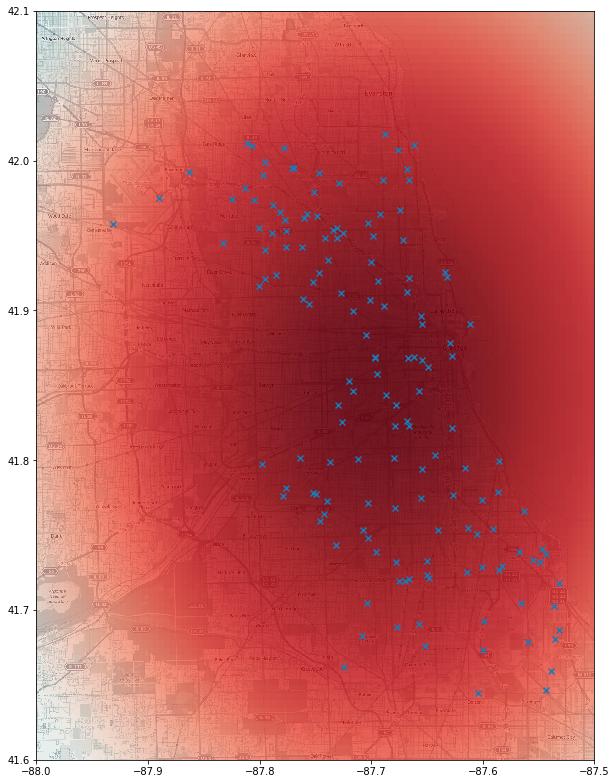

In [412]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("./data/mapdata_copyright_openstreetmap_contributors.txt")
#locations = pd.read_csv('./PREDSMODEL0COMPLETE.csv')[['Longitude', 'Latitude', 'Predictions']]
locations = test33[['Longitude', 'Latitude', 'Predictions']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sigthings = locations[locations['Predictions'] > 0]
sigthings = sigthings.groupby(['Longitude', 'Latitude']).max()['Predictions'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=1)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('bone'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

locations = locations[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

plt.savefig('heatmap.png')